In [3]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re
import netCDF4 as nc

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))


from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.viewer_2d import *
from code_comparison.code_comparison import *

from gridtools.solps_python_scripts.read_b2fgmtry import *


%load_ext autoreload
%autoreload 2
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Gridtools not found
Done


In [4]:
path=os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19")

### Isolate SOLPS extents
- Keep the plot please... the index of the upper target was found manually

b2fgmtry loaded from .pkl
b2fgmtry loaded from .pkl


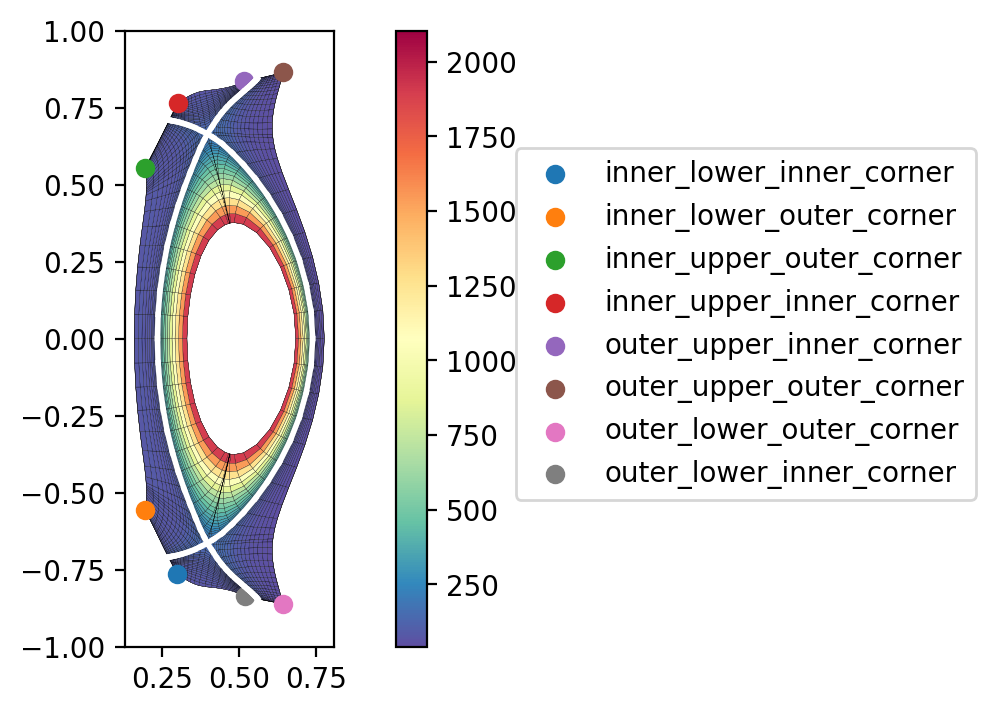

In [5]:
path_solps = os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16")

with nc.Dataset(os.path.join(path_solps, "balance.nc")) as d:
    crx = d["crx"]
    cry = d["cry"]

g = read_b2fgmtry(where=path_solps)
p = SOLPSplot(path_solps, param = "Td+")

plt.close("all")
fig, ax = plt.subplots(dpi = 200, figsize = (8,4))
p.plot(fig = fig, ax = ax, antialias = True, linewidth = 0.1)
ax.set_ylim(-1,1)

upper_break = int(np.mean([g["rightcut"][1], g["leftcut"][0]]))

# upper_break = g["rightcut"].max() - g["leftcut"].min()


# upper_break = g["rightcut"].min() - g["leftcut"].max() +4 

bounds = {
    # It' [corner, radial(logical y), poloidal(logical x)]
    "inner_lower_inner_corner" : [1, 0, 0],
    "inner_lower_outer_corner" : [1, -1, 0],
    "inner_upper_outer_corner" : [1, -1, upper_break + 10],
    "inner_upper_inner_corner" : [1, 0, upper_break + 10],
    "outer_upper_inner_corner" : [1, 0, upper_break + 11],
    "outer_upper_outer_corner" : [1, -1, upper_break + 11],
    "outer_lower_outer_corner" : [1, -1, -1],
    "outer_lower_inner_corner" : [1, 0, -1],
}
rz_extents = dict()

for name in bounds:
    p1 = bounds[name]
    rz_extents[name] = dict()
    rz_extents[name]["R"] = crx[p1[0], p1[1], p1[2]]
    rz_extents[name]["Z"] = cry[p1[0], p1[1], p1[2]]
    
    ax.scatter(crx[p1[0], p1[1], p1[2]], cry[p1[0], p1[1], p1[2]], label = name)
    
fig.legend(loc = "upper left", bbox_to_anchor=(0.85, 0.75))

In [64]:
(wfluxes_all["E_Total"] * wfluxes_all["Area"]).sum()

1639095.5722140092

In [51]:
self = SOLEDGEcase(path)
wfluxes_all = self.get_wall_fluxes(verbose = True)

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


get_wall_triangle
get_wall_triangles
get_wall_triangles.2: Completed
get_wall_triangle: Completed

### TOTAL WALL INTEGRALS------------

### Heat flows:
E_incident_Electron: ---- 0.55 [MW]
E_incident_Ions: ---- 0.96 [MW]
E_Total: ---- 1.64 [MW]
E_incident_Atoms: ---- 0.39 [MW]
E_Radiation_Atoms: ---- 0.07 [MW]
E_Rad_Recombination: ---- -0.45 [MW]
E_Recombination_in_Wall: ---- 0.11 [MW]
E_incident_Molecules: ---- 0.00 [MW]
E_incident_Ions_EIRENE: ---- 1.26 [MW]
E_Radiation: ---- 0.07 [MW]

### Particle flows:
F_Ion_Incident: ---- 4.886e+22 [s-1]
F_Atom_Emitted_from_Ion: ---- 2.919e+22 [s-1]
F_Atom_Incident: ---- 5.015e+22 [s-1]
F_Mol_Incident: ---- 2.124e+21 [s-1]
F_Mol_Emitted_from_Ion: ---- 9.834e+21 [s-1]
F_Atom_Emitted_from_Atom: ---- 3.821e+22 [s-1]
F_Mol_Emitted_from_Atom: ---- 5.380e+21 [s-1]


In [65]:
path=os.path.join(path = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19")
# path=os.path.join(path = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19")

self = SOLEDGEcase(path)
wfluxes_all = self.get_wall_fluxes(verbose = False)


# fig, ax = plt.subplots()
# ax.plot(wfluxes_all["L"], wfluxes_all["pflux_i"])

wfluxes = dict()
df = wfluxes_all.copy()
# wfluxes["all"] = wfluxes_all.copy()
wfluxes["inner_lower_target"] = df.query(f"Z < {rz_extents['inner_lower_outer_corner']['Z']} & R < {rz_extents['inner_lower_inner_corner']['R']}")
wfluxes["inner_wall"] = df.query(f"Z > {rz_extents['inner_lower_outer_corner']['Z']} & R < {rz_extents['inner_upper_outer_corner']['R']} & Z < {rz_extents['inner_upper_outer_corner']['Z']}")
wfluxes["inner_upper_target"] = df.query(f"Z > {rz_extents['inner_upper_outer_corner']['Z']} & R < {rz_extents['inner_upper_inner_corner']['R']}")
wfluxes["upper_pfr"] = df.query(f"R > {rz_extents['inner_upper_inner_corner']['R']} & R < {rz_extents['outer_upper_inner_corner']['R']} & Z > 0")
wfluxes["outer_upper_target"] = df.query(f"R > {rz_extents['outer_upper_inner_corner']['R']} & R < {rz_extents['outer_upper_outer_corner']['R']} & Z > {rz_extents['outer_upper_inner_corner']['Z']}")
wfluxes["lower_pfr"] = df.query(f"R > {rz_extents['inner_upper_inner_corner']['R']} & R < {rz_extents['outer_upper_inner_corner']['R']} & Z < 0")
wfluxes["outer_lower_target"] = df.query(f"R > {rz_extents['outer_lower_inner_corner']['R']} & R < {rz_extents['outer_lower_outer_corner']['R']} & Z < {rz_extents['inner_lower_inner_corner']['Z']}")

# Now going by index. Note that SOLEDGE goes anticlockwise, but we go clockwise...
# wfluxes["upper_chamber"] = df.query(f"index < {wfluxes['outer_upper'].index[0]} & index > {wfluxes['outer_upper'].index[0]} - 45")
# wfluxes["upper_baffle"] = df.query(f"index < {wfluxes['upper_chamber'].index[0]} & index > {wfluxes['upper_chamber'].index[0]} - 16")

# wfluxes["lower_chamber"] = df.query(f"index > {wfluxes['outer_lower'].index[-1]} & index < {wfluxes['outer_lower'].index[-1]} + 45 + 2")    # Asymmetric offset due to oddities in SOLEDGE grid
# wfluxes["lower_baffle"] = df.query(f"index > {wfluxes['lower_chamber'].index[-1]} & index < {wfluxes['lower_chamber'].index[-1]} + 16 - 2")

# Index starts at OMP, so there is index discontinuity in the middle
# wfluxes["outer_lower_wall"] = df.query(f"index > {wfluxes['lower_baffle'].index[-1]}")# & index < {wfluxes['upper_baffle'].index[0]}")
# wfluxes["outer_upper_wall"] = df.query(f"index < {wfluxes['upper_baffle'].index[0]}")


        


c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


get_wall_triangle
get_wall_triangles
get_wall_triangles.2: Completed
get_wall_triangle: Completed


<Axes: >

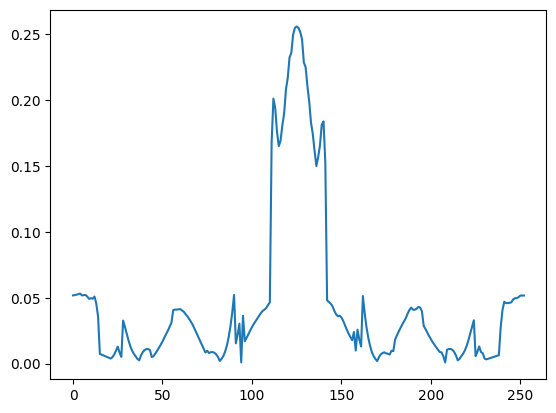

In [60]:
wfluxes_all["Area"].plot()

In [7]:
%matplotlib inline

In [86]:
(wfluxes_all["E_Total"] * wfluxes_all["Area"]).sum() * 1e-6

1.6390955722140093

No duplicates found


(-0.9, 0.9)

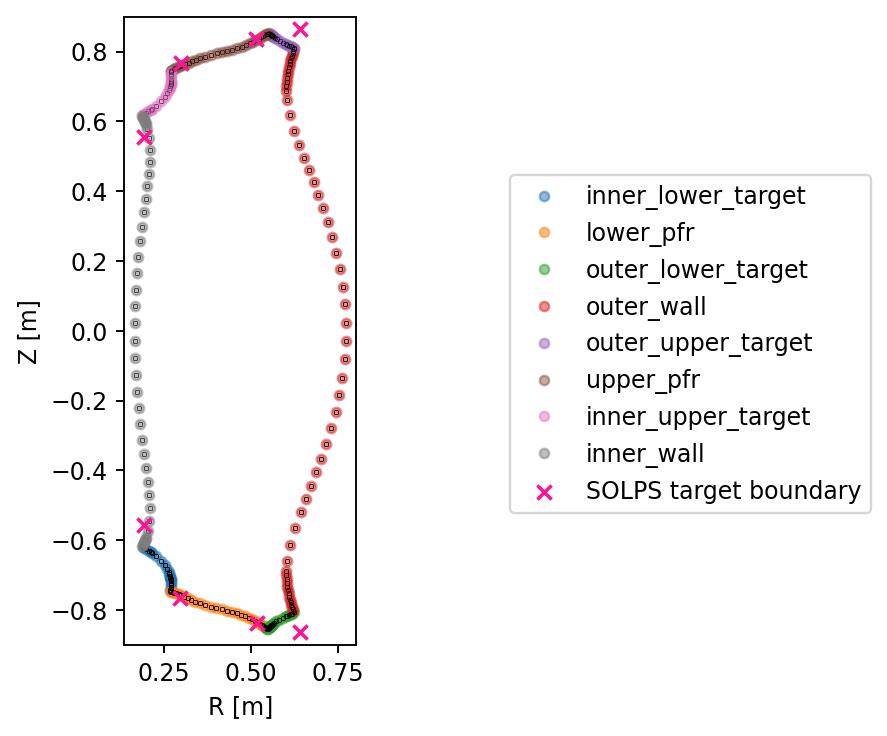

In [66]:
plt.close("all")
wfluxes = dict()
df = wfluxes_all.copy()
# wfluxes["all"] = wfluxes_all.copy()
wfluxes["inner_lower_target"] = df.iloc[slice(22,44),:]
wfluxes["lower_pfr"] = df.iloc[slice(44,74),:]
wfluxes["outer_lower_target"] = df.iloc[slice(74,97),:]
wfluxes["outer_wall"] = df.iloc[slice(97,156),:]
wfluxes["outer_upper_target"] = df.iloc[slice(156,176),:]
wfluxes["upper_pfr"] = df.iloc[slice(176,209),:]
wfluxes["inner_upper_target"] = df.iloc[slice(209,231),:]
wfluxes["inner_wall"] = df.iloc[np.r_[slice(0,22), slice(231,253)],:]


fig, ax = plt.subplots(dpi = 170)

for region in wfluxes.keys():

    ax.plot(df["R"], df["Z"], c = "k", alpha = 1, lw = 0, marker = "o", markersize = 2, markeredgewidth=0.1, markerfacecolor="None")
    if region != "wall":
        ax.plot(wfluxes[region]["R"], wfluxes[region]["Z"],  alpha = 0.5, lw = 0,  label = region, markersize = 4, marker = "o")
           
for i, name in enumerate(rz_extents.keys()):
    label = "SOLPS target boundary" if i == 0 else ""
    ax.scatter(rz_extents[name]["R"], rz_extents[name]["Z"], marker = "x", c = "deeppink", label = label, zorder = 100)
    
# Plot duplicates if any
allregions = pd.concat(wfluxes.values())
dupl = allregions[allregions.duplicated(subset="R")]
if len(dupl) > 0:
    ax.scatter(dupl["R"], dupl["Z"], c = "r", edgecolors="yellow", s = 50, label = "DUPLICATES", zorder = 200)
else:
    print("No duplicates found")
    
ax.set_aspect("equal")
fig.legend(loc="upper left", bbox_to_anchor=(0.75, 0.7))
ax.set_xlabel("R [m]")
ax.set_ylabel("Z [m]")
ax.set_ylim(-0.9, 0.9)

In [90]:
tot = 0
for region in wfluxes.keys():
    tot += (wfluxes[region]["E_Total"] * wfluxes[region]["Area"]).sum() * 1e-6
    
tot

1.6390955722140093

Text(0.5, 1.0, 'E_Total')

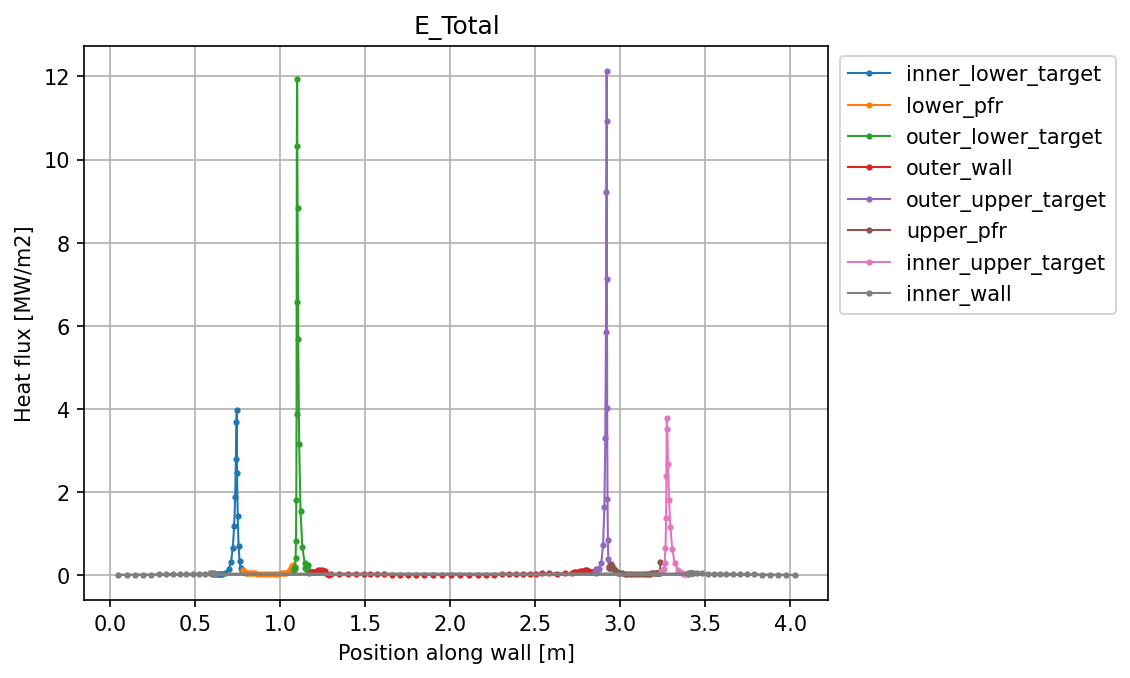

In [47]:
%matplotlib inline
fig, ax = plt.subplots(dpi = 150)
# param = "E_incident_Atoms"
param = "E_Total"
for region in wfluxes.keys():
    ax.plot(wfluxes[region]["dlWall"], wfluxes[region][param]*1e-6, label = region, marker = "o", lw = 1, markersize = 2)
    
ax.legend(loc="upper right", bbox_to_anchor=(1.4,1))
ax.grid()

ax.set_xlabel("Position along wall [m]")
ax.set_yscale("linear")
ax.set_ylabel("Heat flux [MW/m2]")
ax.set_title(param)
# ax.set_xlim(3.6,3.7)

# Wall integrals

# WARNING "Area" seems to be wrong here, even though it's correct upstream and in wrapper_class.
- For now I'm just reconstructing the area

In [122]:
import copy
df = pd.DataFrame()
# wfluxes_integral = copy.deepcopy(wfluxes)
wfluxes_integral = pd.DataFrame()

params = [x for x in wfluxes_all.columns if x not in ["R", "Z", 'iTri', 'iSide', 'iProp', 'dlSurf', 'dlWall', 'Area']]

for region in wfluxes.keys():
    for param in params:
        # w = wfluxes_integral[region]
        # area = w["dlWall"] * w["R"] * 2 * np.pi
        wfluxes_integral.loc[region, param] = (wfluxes[region][param] * wfluxes[region]["Area"]).sum()
        # wfluxes_integral[region][param] = (wfluxes_integral[region][param] * wfluxes_integral[region]["Area"]).sum()
        # if "hflux_par_tot" not in param: # This is a scalar
        # df.loc[region, param] = wfluxes_integral[region][param].sum()


# wfluxes_regions = df.transpose()

In [106]:
tot = 0
for region in wfluxes.keys():
    tot += (wfluxes[region]["E_Total"] * wfluxes[region]["Area"]).sum() * 1e-6
    
tot

1.6390955722140093

In [123]:
wfluxes_integral

,F_Ion_Incident,F_Atom_Emitted_from_Ion,F_Atom_Incident,F_Mol_Incident,F_Mol_Emitted_from_Ion,F_Atom_Emitted_from_Atom,F_Mol_Emitted_from_Atom,E_incident_Electron,E_incident_Ions,E_Total,E_incident_Atoms,E_Radiation_Atoms,E_Rad_Recombination,E_Recombination_in_Wall,E_incident_Molecules,E_incident_Ions_EIRENE,E_Radiation
inner_lower_target,5.184224e+21,3.068479e+21,1.433211e+21,2.347242e+19,1.057872e+21,1.081636e+21,1.757872e+20,59218.584096,109790.411915,144565.480822,10419.722158,3852.975483,-50447.439312,11731.228064,0.0,140842.559883,3852.975483
lower_pfr,0.000000e+00,0.000000e+00,7.146816e+21,2.284701e+20,0.000000e+00,5.555425e+21,7.956956e+20,0.000000,0.000000,50384.018702,39600.593976,10502.954702,0.000000,280.469954,0.0,0.000000,10502.954702
outer_lower_target,1.961381e+22,1.176788e+22,7.839288e+21,4.134471e+20,3.922970e+21,6.039355e+21,8.999666e+20,218945.397587,366635.826414,487913.228306,26179.762019,6267.420896,-174553.538084,44438.354150,0.0,484000.024072,6267.420896
outer_wall,0.000000e+00,0.000000e+00,1.845098e+22,9.846037e+20,0.000000e+00,1.371612e+22,1.777601e+21,0.000000,0.000000,232056.518049,210326.218488,21103.723978,0.000000,626.575781,0.0,0.000000,21103.723978
outer_upper_target,1.888751e+22,1.127454e+22,5.894557e+21,2.057956e+20,3.806484e+21,4.587803e+21,6.533773e+20,217753.857724,382543.286304,493835.074551,23038.758538,6002.660551,-178231.240698,42727.752749,0.0,498164.002205,6002.660551
upper_pfr,1.304832e+20,8.758513e+19,7.015190e+21,2.280672e+20,2.144904e+19,5.477885e+21,7.686521e+20,234.454640,1283.252733,52289.724924,42042.703928,8769.980924,-603.487202,562.819866,0.0,1356.305821,8769.980924
inner_upper_target,5.041735e+21,2.990428e+21,1.393611e+21,2.224302e+19,1.025654e+21,1.048839e+21,1.723859e+20,58012.247379,104360.321702,139484.891171,10880.560926,3226.749130,-48403.178465,11408.189870,0.0,134609.182653,3226.749130
inner_wall,0.000000e+00,0.000000e+00,9.785157e+20,1.825320e+19,0.000000e+00,7.058009e+20,1.363574e+20,0.000000,0.000000,38566.635689,26182.268889,12336.303017,0.000000,48.063812,0.0,0.000000,12336.303017


In [115]:
(wfluxes[region][param] * wfluxes[region]["Area"]).sum()

12336.303016934182

In [109]:
wfluxes_integral["E_Total"].sum()

KeyError: 'E_Total'

In [95]:
df["E_Total"].sum()*1e-6

1030.36989582159

In [50]:
# MATCHING TFlux_ETot which is supposed to be E_Total

wfluxes_regions.loc["E_Total"].sum()

166361817.77789998

In [18]:
wfluxes_regions.loc["E_incident_Atoms"]

inner_lower_target    0.000144
lower_pfr             0.001017
outer_lower_target    0.000582
outer_wall            0.028532
outer_upper_target    0.000508
upper_pfr             0.001105
inner_upper_target    0.000156
inner_wall            0.001136
Name: E_incident_Atoms, dtype: float64

In [127]:
df2 = wfluxes_integral

df2 = df2[["E_Total", "E_incident_Electron", "E_incident_Ions", "E_incident_Atoms", "E_incident_Molecules", "E_Radiation", "E_Radiation_Atoms", "E_Rad_Recombination", "E_Recombination_in_Wall"]] * 1e-6
df2.loc["targets", : ] = df2.loc[["inner_lower_target", "outer_lower_target", "outer_upper_target", "inner_upper_target"]].sum() 
df2.loc["pfr", : ] = df2.loc[["lower_pfr", "upper_pfr"]].sum() 
df2 = df2.loc[["outer_wall", "inner_wall", "targets", "pfr"]]
# df2 = df2.loc[["inner_lower_target", "lower_pfr"]]

def styler(s):
        if abs(s) < 0.01 or pd.isna(s):
            c =  "color: lightgrey"
        else:
            c =  "color: black"

        return c
        
ts = df2.transpose().style.format("{:.3f}")
ts = ts.applymap(styler)
display(ts)

,outer_wall,inner_wall,targets,pfr
E_Total,0.232,0.039,1.266,0.103
E_incident_Electron,0.000,0.000,0.554,0.000
E_incident_Ions,0.000,0.000,0.963,0.001
E_incident_Atoms,0.210,0.026,0.071,0.082
E_incident_Molecules,0.000,0.000,0.000,0.000
E_Radiation,0.021,0.012,0.019,0.019
E_Radiation_Atoms,0.021,0.012,0.019,0.019
E_Rad_Recombination,0.000,0.000,-0.452,-0.001
E_Recombination_in_Wall,0.001,0.000,0.110,0.001


In [128]:
df2["E_incident_Atoms"].sum()

0.388670588921723

In [21]:
wfluxes_regions.index

Index(['iTri', 'iSide', 'iProp', 'dlSurf', 'dlWall', 'Area', 'F_Ion_Incident',
       'F_Atom_Emitted_from_Ion', 'F_Atom_Incident', 'F_Mol_Incident',
       'F_Mol_Emitted_from_Ion', 'F_Atom_Emitted_from_Atom',
       'F_Mol_Emitted_from_Atom', 'E_incident_Electron', 'E_incident_Ions',
       'E_Total', 'E_incident_Atoms', 'E_Radiation_Atoms',
       'E_Rad_Recombination', 'E_Recombination_in_Wall',
       'E_incident_Molecules', 'E_incident_Ions_EIRENE', 'E_Radiation'],
      dtype='object')

In [17]:
wfluxes_regions.loc["E_incident_Atoms"].sum()

33179.78954030544

In [2]:
0.031+0.033


0.064

In [1]:
0.0043 + 0.0175 + 0.0153 + 0.0046

0.0417

([<matplotlib.patches.Wedge at 0x1cdcc552560>,
 [Text(1.499860227135907, 0.02047679310404188, 'inner_lower_target'),
  Text(1.4885622827703637, 0.18488464055589818, 'lower_pfr'),
  Text(1.4436765175819326, 0.40718314378483744, 'outer_lower_target'),
  Text(-1.4909182829439729, 0.1648110238527616, 'outer_wall'),
  Text(1.3148951701469418, -0.721838410950986, 'outer_upper_target'),
  Text(1.409415748229562, -0.5133685310208487, 'upper_pfr'),
  Text(1.46052014059848, -0.34187851483560094, 'inner_upper_target'),
  Text(1.4913243809401249, -0.16109497451365026, 'inner_wall')],
 [Text(1.299878863517786, 0.01774655402350296, '0.4%'),
  Text(1.2900873117343152, 0.1602333551484451, '3.1%'),
  Text(1.251186315237675, 0.35289205794685913, '1.8%'),
  Text(-1.2921291785514433, 0.1428362206723934, '86.0%'),
  Text(1.1395758141273498, -0.6255932894908546, '1.5%'),
  Text(1.2214936484656203, -0.44491939355140225, '3.3%'),
  Text(1.265784121852016, -0.29629471285752085, '0.5%'),
  Text(1.29248113014810

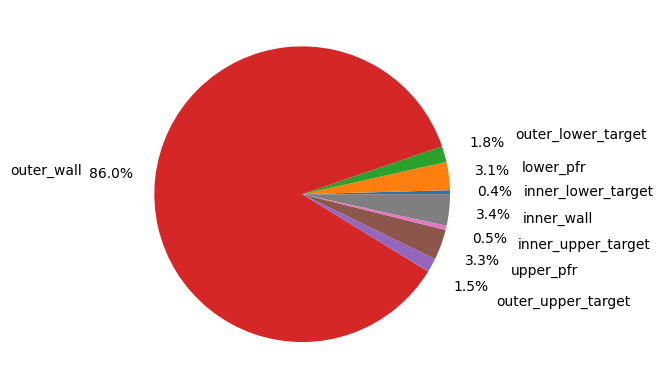

In [16]:
sums = ((wfluxes_regions.loc["E_incident_Atoms"]) / wfluxes_regions.loc["E_incident_Atoms"].sum()) 

fig, ax = plt.subplots()
# sums.plot.pie(autopct='%1.1f%%', pctdistance = 1.3, labeldistance = 1.5)
ax.pie(sums.values, labels=sums.index, autopct='%1.1f%%', pctdistance = 1.3, labeldistance = 1.5)

# SOLPS wall loads

In [96]:

path = os.path.join(onedrive_path, r"Project\collab\From\Matteo\2023-03-08 - Display tallies ppt\display_tallies.csv")
solps = read_display_tallies(path)

solps["xreg"].loc["fhtxreg"]

total                                 0.0
inner_lower_target              -177000.0
inner_lower_entrance            -185000.0
inner_upper_entrance             187000.0
inner_upper_target               179000.0
outer_upper_target              -587000.0
outer_upper_entrance            -607000.0
outer_lower_entrance             605000.0
outer_lower_target               586000.0
lower_inner_pfr_to_inner_core   -144000.0
inner_core_to_inner_upper_pfr      -731.0
outer_upper_pfr_to_outer_core    364000.0
outer_core_to_outer_lower_pfr      1150.0
Name: fhtxreg, dtype: float64

# Target fluxes

In [106]:
wall_tallies

,soledge,solps,difference wrt. solps
pflux_i,1.950217e+22,1.682000e+22,0.159463
hflux_tot,1.590412e+00,NaN,NaN
hflux_totrad,2.211828e-02,NaN,NaN
hflux_par_e,6.168931e-01,5.384000e-01,0.145789
hflux_par_i,6.903952e-01,5.127600e-01,0.346430
pflux_a,4.064725e+22,NaN,NaN
pflux_m,2.123208e+22,NaN,NaN
pflux_n,8.311142e+22,NaN,NaN
hflux_par_tot,NaN,1.529000e+00,NaN


In [195]:
wall_tallies = pd.DataFrame()

all_targets = ["inner_lower_target", "inner_upper_target", "outer_lower_target", "outer_upper_target"]


wall_tallies.loc["hflux_par_e", "solps"] = solps["xreg"].loc["fhexreg", all_targets].abs().sum()*1e-6

# fhixreg: parallel thermal energy flow. 
# fhmxreg: parallel kinetic energy flow. 
# fhtxreg: total energy flow.

wall_tallies.loc["hflux_par_i", "solps"] = solps["xreg"].loc[["fhixreg", "fhmxreg", "fhpxreg", "fhjxreg"],all_targets].abs().sum().sum()*1e-6
wall_tallies.loc["pflux_i", "solps"] = solps["xreg"].loc["fnaxreg", all_targets].abs().sum()
wall_tallies.loc["hflux_par_tot", "solps"] = solps["xreg"].loc["fhtxreg", all_targets].abs().sum()*1e-6

wfluxes_regions.loc["hflux_tot", ["inner_lower", "inner_upper", "outer_upper", "outer_lower"]].sum()

# wall_tallies["difference wrt. solps"] = (wall_tallies["soledge"] - wall_tallies["solps"]) / wall_tallies["solps"] 

# wall_tallies.loc[["pflux_i", "hflux_par_e", "hflux_par_i", "hflux_par_tot"],:]

wall_tallies

,solps
hflux_par_e,5.384000e-01
hflux_par_i,5.523330e-01
pflux_i,1.682000e+22
hflux_par_tot,1.529000e+00


In [157]:
wall_tallies.loc["pflux_i", "soledge"] * 13.6 * constants("q_e") * 1e-6

0.042494441657814616

In [164]:
df = pd.DataFrame()
df.loc["TFluxEe", "value"] = wall_tallies.loc["hflux_par_e", "soledge"]
df.loc["TFluxEi", "value"] = wall_tallies.loc["hflux_par_i", "soledge"]
df.loc["TFluxi*13.6*q_e"] = wall_tallies.loc["pflux_i", "soledge"] * 13.6 * constants("q_e") * 1e-6
df.loc["TFluxERadTot"] = wall_tallies.loc["hflux_totrad", "soledge"]
df.loc["sum"] = df["value"].sum()
df.loc["FluxETot"] = wall_tallies.loc["hflux_tot", "soledge"]
df.loc["ERROR"] = df.loc["sum"] - df.loc["FluxETot"]

df

,value
TFluxEe,0.616893
TFluxEi,0.690395
TFluxi*13.6*q_e,0.042494
TFluxERadTot,0.022118
sum,1.371901
FluxETot,1.590412
ERROR,-0.218511


In [170]:
plt.close("all")
%matplotlib inline

In [183]:
np.array([wfluxes_integral[x]["hflux_tot"].sum() for x in ["inner_lower", "inner_upper", "outer_upper", "outer_lower"]]).sum()

1.1237672609527058

In [176]:
wfluxes_integral_all = pd.concat([x for x in wfluxes_integral.values()]).sort_index()
wfluxes_integral_all["hflux_tot"].sum()

1.5904124434022946

### SOLPS ion flux breakdown

In [131]:
df = pd.DataFrame()

labels = ["Thermal i,n energy", "Thermal e energy", "Kinetic i,n energy", "Ionisation i,n energy", "Electrostatic i,n energy"]
for i, param in enumerate(["fhixreg", "fhexreg", "fhmxreg", "fhpxreg", "fhjxreg"]):
    df.loc[param, "name"] = labels[i]
    df.loc[param, "value"] = solps["xreg"].loc[[param],all_targets].abs().sum().sum()*1e-6
    
df.loc["total", "value"] = df["value"].sum()

df.loc["fhtxreg", "name"] = "Total energy"
df.loc["fhtxreg", "value"] = solps["xreg"].loc[["fhtxreg"],all_targets].abs().sum().sum()*1e-6
df.loc["ERROR", "value"] = df.loc["total", "value"] - df.loc["fhtxreg", "value"]


,name,value
fhixreg,"Thermal i,n energy",0.481600
fhexreg,Thermal e energy,0.538400
fhmxreg,"Kinetic i,n energy",0.031160
fhpxreg,"Ionisation i,n energy",0.036680
fhjxreg,"Electrostatic i,n energy",0.002893
total,NaN,1.090733
fhtxreg,Total energy,1.529000
ERROR,NaN,-0.438267


In [144]:
solps["xreg"]

,total,inner_lower_target,inner_lower_entrance,inner_upper_entrance,inner_upper_target,outer_upper_target,outer_upper_entrance,outer_lower_entrance,outer_lower_target,lower_inner_pfr_to_inner_core,inner_core_to_inner_upper_pfr,outer_upper_pfr_to_outer_core,outer_core_to_outer_lower_pfr
param,,,,,,,,,,,,,
fnaxreg,0.0,-1.860000e+21,-1.030000e+21,1.050000e+21,1.890000e+21,-6.540000e+21,-3.770000e+21,3.780000e+21,6.530000e+21,-1.980000e+20,-1.390000e+20,5.080000e+20,1.400000e+20
fnaxreg_n,0.0,1.860000e+11,-5.250000e+10,5.100000e+10,-1.890000e+11,6.540000e+11,-9.250000e+10,9.610000e+10,-6.530000e+11,8.240000e+08,9.230000e+09,-4.240000e+08,-6.780000e+09
fnaxreg_i,0.0,-1.860000e+21,-1.030000e+21,1.050000e+21,1.890000e+21,-6.540000e+21,-3.770000e+21,3.780000e+21,6.530000e+21,-1.980000e+20,-1.390000e+20,5.080000e+20,1.400000e+20
fhixreg,0.0,-5.630000e+04,-7.910000e+04,8.000000e+04,5.730000e+04,-1.840000e+05,-2.670000e+05,2.660000e+05,1.840000e+05,-6.350000e+04,-1.230000e+03,1.410000e+05,1.510000e+03
fhexreg,0.0,-6.190000e+04,-7.880000e+04,7.940000e+04,6.250000e+04,-2.070000e+05,-2.630000e+05,2.620000e+05,2.070000e+05,-3.860000e+04,2.380000e+03,9.930000e+04,-2.230000e+03
fhpxreg,0.0,-4.060000e+03,-2.250000e+03,2.290000e+03,4.120000e+03,-1.430000e+04,-8.210000e+03,8.230000e+03,1.420000e+04,-4.310000e+02,-3.040000e+02,1.110000e+03,3.050000e+02
fhpxreg_n,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fhpxreg_i,0.0,-4.060000e+03,-2.250000e+03,2.290000e+03,4.120000e+03,-1.430000e+04,-8.210000e+03,8.230000e+03,1.420000e+04,-4.310000e+02,-3.040000e+02,1.110000e+03,3.050000e+02
fhmxreg,0.0,-2.230000e+03,4.370000e+03,-4.360000e+03,2.130000e+03,-1.340000e+04,2.520000e+04,-2.530000e+04,1.340000e+04,-4.540000e-01,1.270000e+03,1.680000e-01,-1.280000e+03


In [153]:
pflux = solps["xreg"].loc["fnaxreg", all_targets].abs().sum()
print(pflux * 13.6 * constants("q_e") * 1e-6)
print(solps["xreg"].loc["fhpxreg", all_targets].abs().sum()*1e-6)

0.03665011061415899
0.03668


### SOLPS electron flux breakdown

In [127]:
df = pd.DataFrame()

labels = ["Thermal energy"]
for i, param in enumerate(["fhexreg"]):
    df.loc[param, "name"] = labels[i]
    df.loc[param, "value"] = solps["xreg"].loc[[param],all_targets].abs().sum().sum()*1e-6
    
df.loc["total", "value"] = df["value"].sum()
df

,name,value
fhexreg,Thermal energy,0.5384
total,NaN,0.5384


In [100]:
wall_tallies.loc["hflux_par_e", "soledge"] + wall_tallies.loc["hflux_par_i", "soledge"]

1.3072883044657115

In [134]:
solps["xreg"]

,total,inner_lower_target,inner_lower_entrance,inner_upper_entrance,inner_upper_target,outer_upper_target,outer_upper_entrance,outer_lower_entrance,outer_lower_target,lower_inner_pfr_to_inner_core,inner_core_to_inner_upper_pfr,outer_upper_pfr_to_outer_core,outer_core_to_outer_lower_pfr
param,,,,,,,,,,,,,
fnaxreg,0.0,-1.860000e+21,-1.030000e+21,1.050000e+21,1.890000e+21,-6.540000e+21,-3.770000e+21,3.780000e+21,6.530000e+21,-1.980000e+20,-1.390000e+20,5.080000e+20,1.400000e+20
fnaxreg_n,0.0,1.860000e+11,-5.250000e+10,5.100000e+10,-1.890000e+11,6.540000e+11,-9.250000e+10,9.610000e+10,-6.530000e+11,8.240000e+08,9.230000e+09,-4.240000e+08,-6.780000e+09
fnaxreg_i,0.0,-1.860000e+21,-1.030000e+21,1.050000e+21,1.890000e+21,-6.540000e+21,-3.770000e+21,3.780000e+21,6.530000e+21,-1.980000e+20,-1.390000e+20,5.080000e+20,1.400000e+20
fhixreg,0.0,-5.630000e+04,-7.910000e+04,8.000000e+04,5.730000e+04,-1.840000e+05,-2.670000e+05,2.660000e+05,1.840000e+05,-6.350000e+04,-1.230000e+03,1.410000e+05,1.510000e+03
fhexreg,0.0,-6.190000e+04,-7.880000e+04,7.940000e+04,6.250000e+04,-2.070000e+05,-2.630000e+05,2.620000e+05,2.070000e+05,-3.860000e+04,2.380000e+03,9.930000e+04,-2.230000e+03
fhpxreg,0.0,-4.060000e+03,-2.250000e+03,2.290000e+03,4.120000e+03,-1.430000e+04,-8.210000e+03,8.230000e+03,1.420000e+04,-4.310000e+02,-3.040000e+02,1.110000e+03,3.050000e+02
fhpxreg_n,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fhpxreg_i,0.0,-4.060000e+03,-2.250000e+03,2.290000e+03,4.120000e+03,-1.430000e+04,-8.210000e+03,8.230000e+03,1.420000e+04,-4.310000e+02,-3.040000e+02,1.110000e+03,3.050000e+02
fhmxreg,0.0,-2.230000e+03,4.370000e+03,-4.360000e+03,2.130000e+03,-1.340000e+04,2.520000e+04,-2.530000e+04,1.340000e+04,-4.540000e-01,1.270000e+03,1.680000e-01,-1.280000e+03


In [138]:
pd.DataFrame(solps["xreg"][all_targets].abs().sum(axis=1)*1e-6)

,0
param,
fnaxreg,1.682000e+16
fnaxreg_n,1.682000e+06
fnaxreg_i,1.682000e+16
fhixreg,4.816000e-01
fhexreg,5.384000e-01
fhpxreg,3.668000e-02
fhpxreg_n,0.000000e+00
fhpxreg_i,3.668000e-02
fhmxreg,3.116000e-02
